In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file
df = pd.read_csv('Bird_Strikes.csv')

In [3]:
print(df.head())

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight     FlightDate  \
0                             859         Engine Shut Down  11/23/00 0:00   
1                             424                      NaN   7/25/01 0:00   
2                            

In [4]:

# get top 10 airlines with most bird strikes
top_airlines = df['Aircraft: Airline/Operator'].value_counts()[:10]

top_airlines

Aircraft: Airline/Operator
SOUTHWEST AIRLINES         4628
BUSINESS                   3074
AMERICAN AIRLINES          2058
DELTA AIR LINES            1349
AMERICAN EAGLE AIRLINES     932
SKYWEST AIRLINES            891
US AIRWAYS*                 797
JETBLUE AIRWAYS             708
UPS AIRLINES                590
US AIRWAYS                  540
Name: count, dtype: int64

In [5]:

# get top 50 airports with most bird strikes
top_airports = df['Airport: Name'].value_counts()[:50]

top_airports

Airport: Name
DALLAS/FORT WORTH INTL ARPT               803
SACRAMENTO INTL                           676
SALT LAKE CITY INTL                       479
DENVER INTL AIRPORT                       476
KANSAS CITY INTL                          452
PHILADELPHIA INTL                         442
ORLANDO INTL                              408
BALTIMORE WASH INTL                       401
LOUISVILLE INTL ARPT                      395
JOHN F KENNEDY INTL                       390
CHARLOTTE/DOUGLAS INTL ARPT               367
NASHVILLE INTL                            364
LAMBERT-ST LOUIS INTL                     363
CHICAGO O'HARE INTL ARPT                  332
DETROIT METRO WAYNE COUNTY ARPT           321
PORTLAND INTL (OR)                        313
NEWARK LIBERTY INTL ARPT                  305
CINCINNATI/NORTHERN KENTUCKY INTL ARPT    302
ATLANTA INTL                              296
CHICAGO MIDWAY INTL ARPT                  296
HOUSTON-HOBBY                             294
FORT LAUDERDALE/HOLL

In [6]:
# get yearly cost incurred due to bird strikes
yearly_cost = df.groupby('FlightDate')['Cost: Total $'].sum()

yearly_cost

FlightDate
1/1/01 0:00                             0
1/1/02 0:00                            00
1/1/03 0:00                         00000
1/1/04 0:00                             0
1/1/05 0:00                       117,135
                          ...            
9/9/07 0:00                     000000000
9/9/08 0:00                0000000006,061
9/9/09 0:00          00231,90900000000000
9/9/10 0:00             00000000000000000
9/9/11 0:00    00108,49300000000000000000
Name: Cost: Total $, Length: 4225, dtype: object

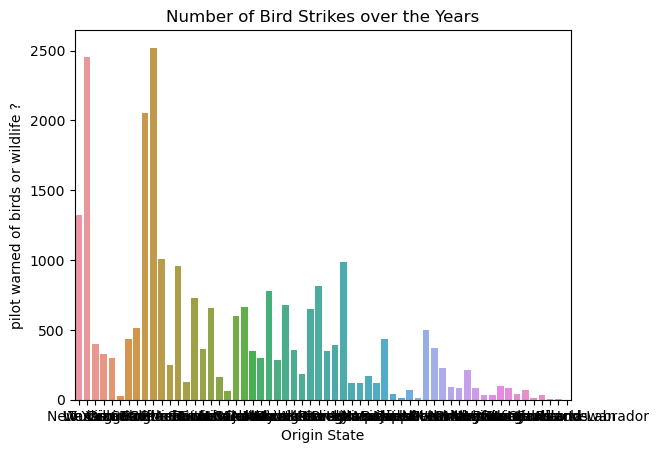

In [7]:

# visualize number of bird strikes over the years
sns.countplot(x='Origin State', data=df)
plt.title('Number of Bird Strikes over the Years')
plt.xlabel('Origin State')
plt.ylabel('pilot warned of birds or wildlife ?')
plt.show()

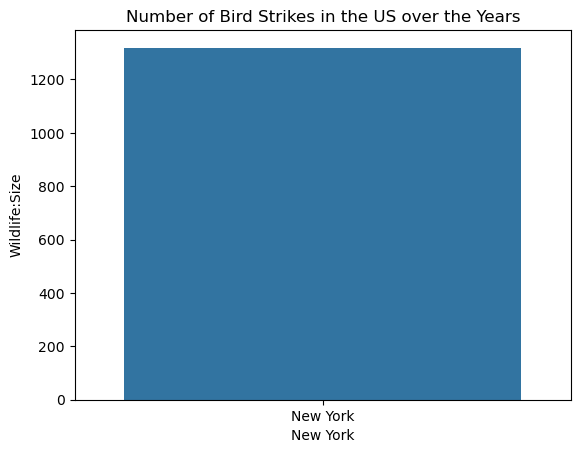

In [8]:
# yearly analysis of bird strikes in the US
sns.countplot(x='Origin State', data=df[df['Origin State'] == 'New York'])
plt.title('Number of Bird Strikes in the US over the Years')
plt.xlabel('New York')
plt.ylabel('Wildlife:Size')
plt.show()

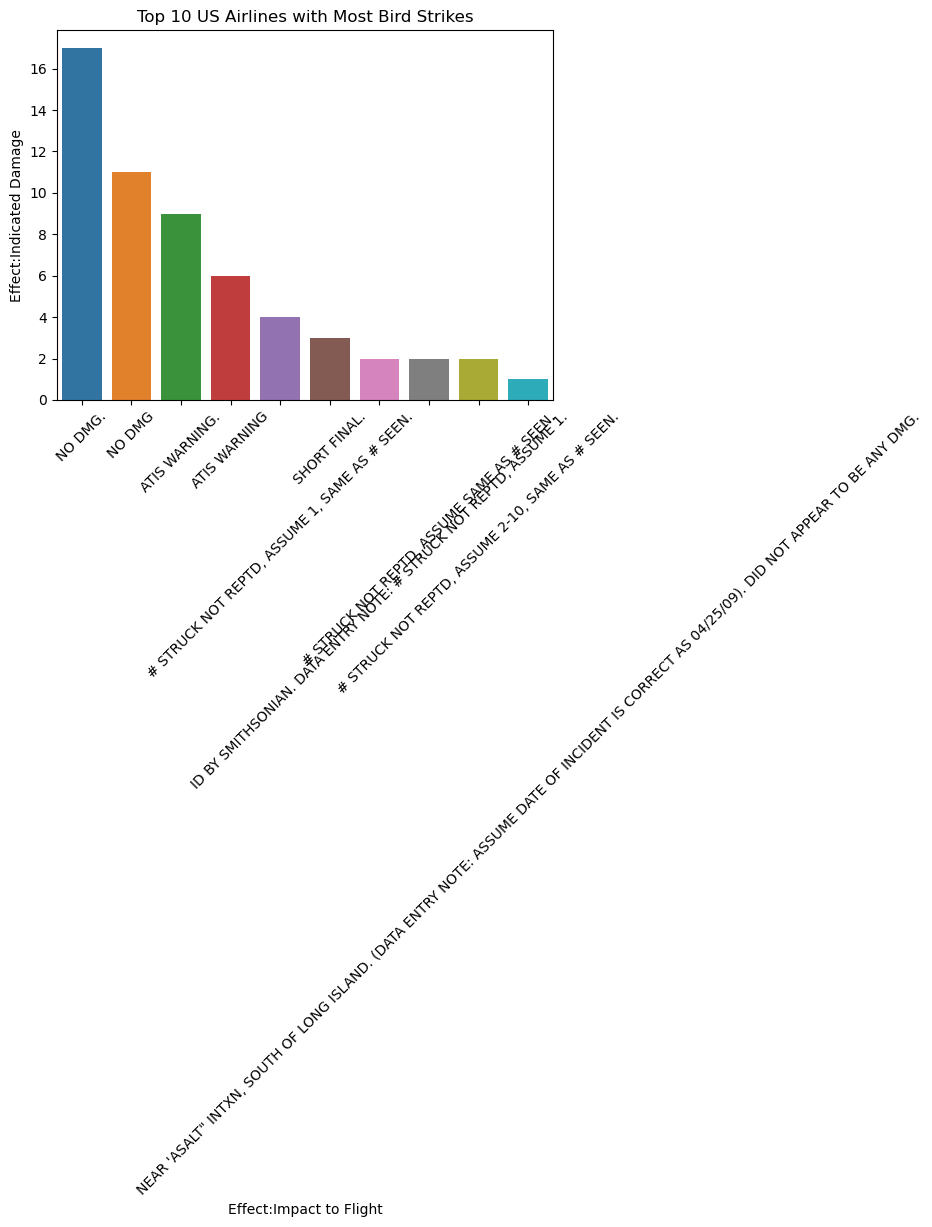

In [9]:
# top 10 US airlines with most bird strikes
top_airlines = df[df['Origin State'] == 'New York']['Remarks'].value_counts()[:10]
sns.barplot(x=top_airlines.index, y=top_airlines.values)
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Effect:Impact to Flight')
plt.ylabel('Effect:Indicated Damage')
plt.xticks(rotation=45)
plt.show()

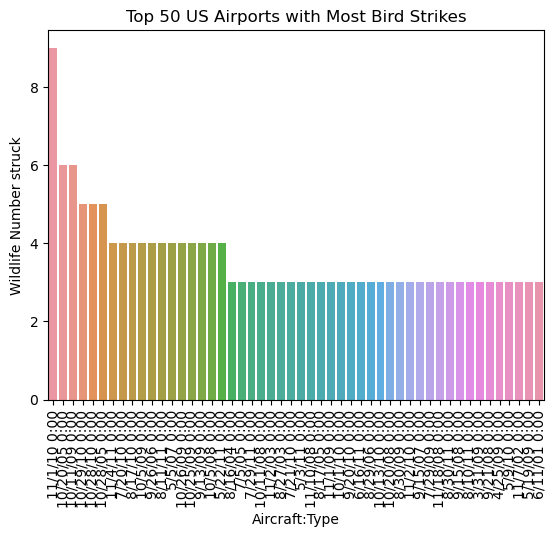

In [10]:
# airports with most incidents of bird strikes - top 50
top_airports = df[df['Origin State'] == 'New York']['FlightDate'].value_counts()[:50]
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.title('Top 50 US Airports with Most Bird Strikes')
plt.xlabel('Aircraft:Type')
plt.ylabel('Wildlife Number struck')
plt.xticks(rotation=90)
plt.show()

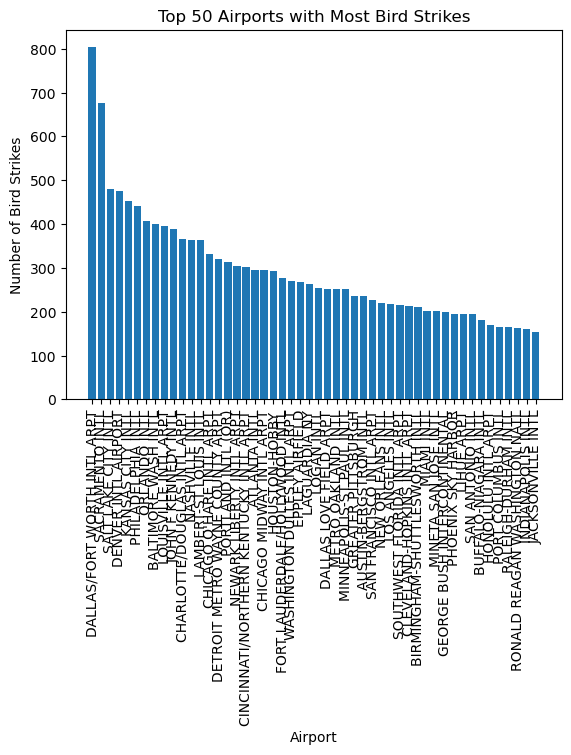

In [11]:
# visualize top 50 airports with most bird strikes
top_airports = df.groupby('Airport: Name')['Record ID'].count().sort_values(ascending=False)[:50]
plt.bar(top_airports.index, top_airports.values)
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xticks(rotation=90)
plt.show()

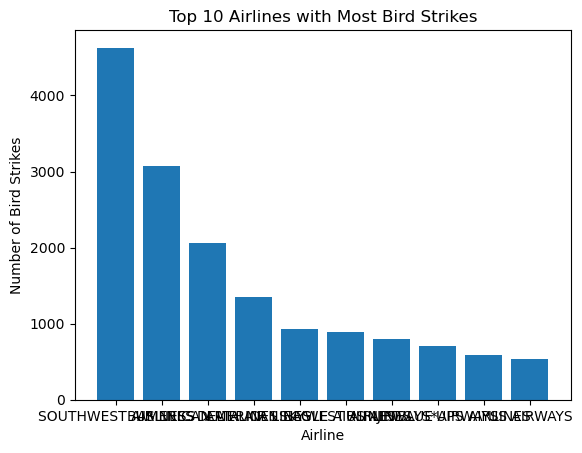

In [12]:
# visualize top 10 airlines with most bird strikes
top_airlines = df.groupby('Aircraft: Airline/Operator')['Record ID'].count().sort_values(ascending=False)[:10]
plt.bar(top_airlines.index, top_airlines.values)
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.title('Top 10 Airlines with Most Bird Strikes')
plt.show()

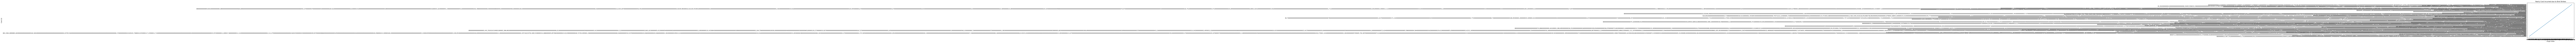

In [13]:
# visualize yearly cost incurred due to bird strikes

yearly_cost = df.groupby('Origin State')['Cost: Total $'].sum()
plt.plot(yearly_cost.index, yearly_cost.values)
plt.xlabel('Origin State')
plt.ylabel('Cost ($)')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.show()

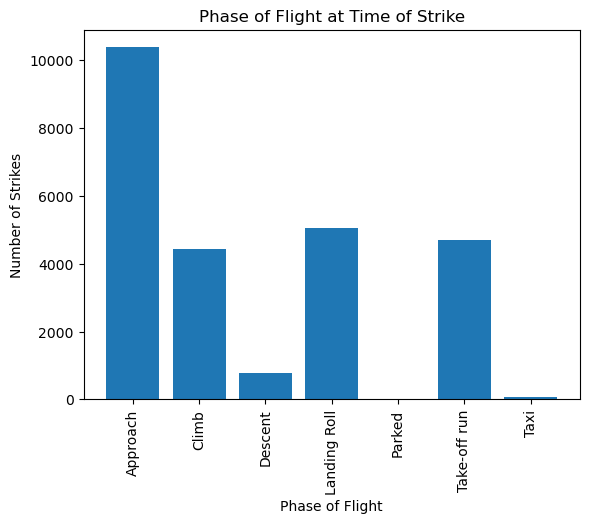

In [14]:
# visualize phase of flight at the time of strike
phase_of_flight = df.groupby('When: Phase of flight')['Record ID'].count()
plt.bar(phase_of_flight.index, phase_of_flight.values)
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Strikes')
plt.title('Phase of Flight at Time of Strike')
plt.xticks(rotation=90)
plt.show()

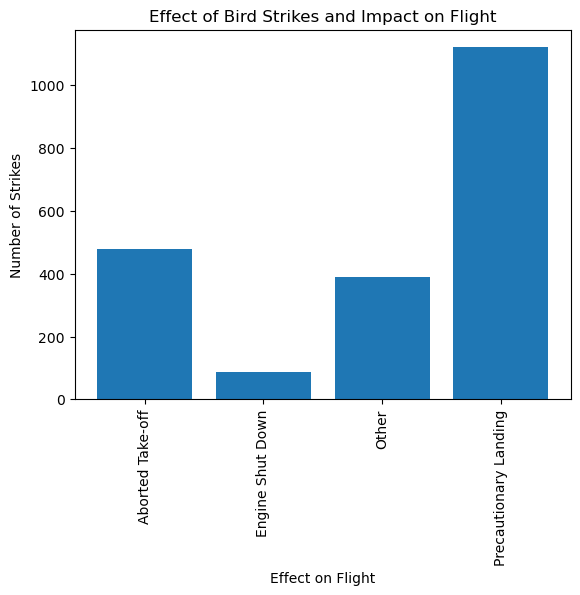

In [15]:
# visualize effect of bird strikes and impact on flight
effect = df.groupby('Effect: Impact to flight')['Record ID'].count()
plt.bar(effect.index, effect.values)
plt.xlabel('Effect on Flight')
plt.ylabel('Number of Strikes')
plt.title('Effect of Bird Strikes and Impact on Flight')
plt.xticks(rotation=90)
plt.show()

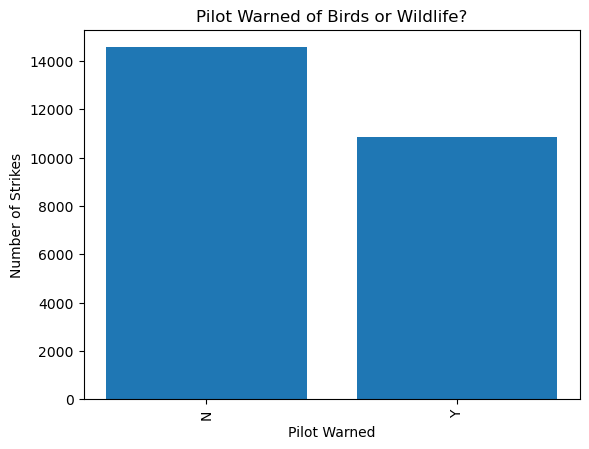

In [16]:
# visualize if pilots were informed and prior warning and effect of strike relation
pilot_warned = df.groupby('Pilot warned of birds or wildlife?')['Record ID'].count()
plt.bar(pilot_warned.index, pilot_warned.values)
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Strikes')
plt.title('Pilot Warned of Birds or Wildlife?')
plt.xticks(rotation=90)
plt.show()

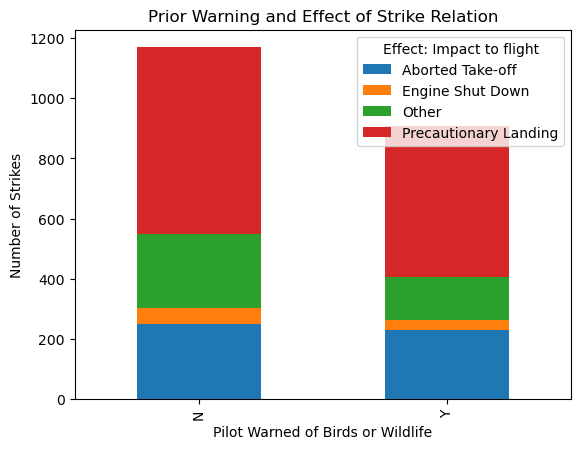

In [17]:
# get prior warning and effect of strike relation
prior_warning = df.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts()

# plot stacked bar graph
prior_warning.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Pilot Warned of Birds or Wildlife')
plt.ylabel('Number of Strikes')
plt.title('Prior Warning and Effect of Strike Relation')
plt.show()

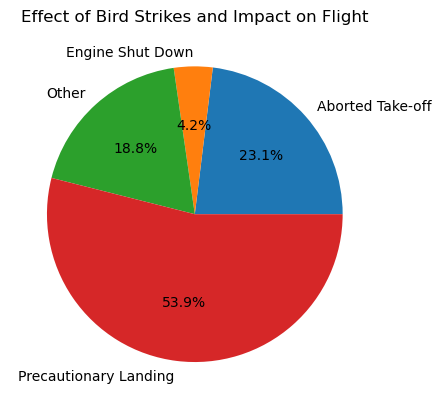

In [18]:
# plot pie chart
plt.pie(effect, labels=effect.index, autopct='%1.1f%%')
plt.title('Effect of Bird Strikes and Impact on Flight')
plt.show()

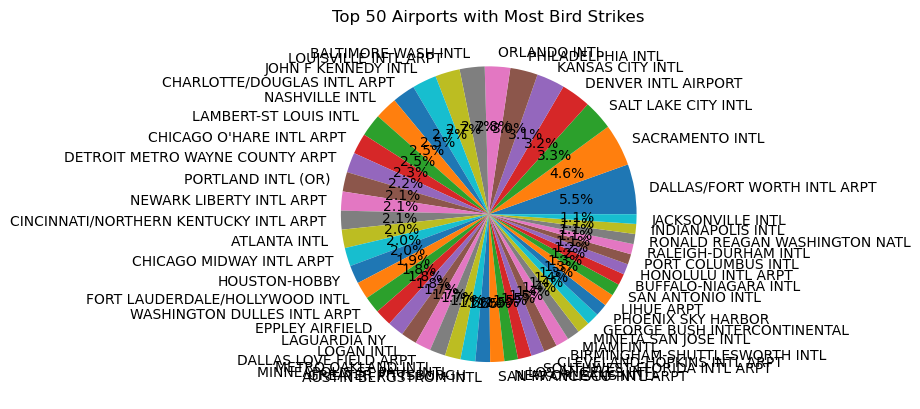

In [19]:
# plot pie chart
plt.pie(top_airports, labels=top_airports.index, autopct='%1.1f%%')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.show()

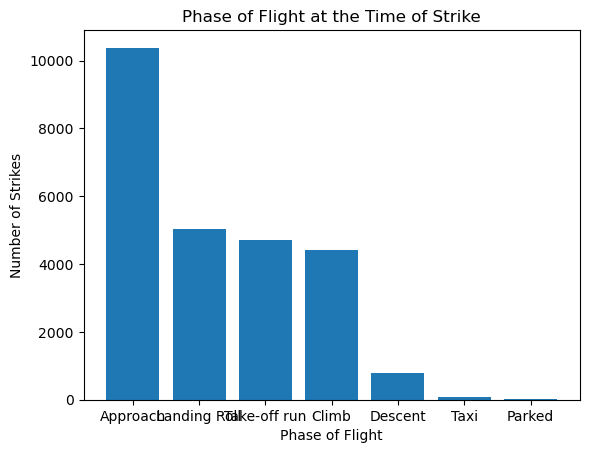

In [20]:
# get phase of flight at the time of strike
phase_of_flight = df['When: Phase of flight'].value_counts()

# plot bar graph
plt.bar(phase_of_flight.index, phase_of_flight.values)
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Strikes')
plt.title('Phase of Flight at the Time of Strike')
plt.show()

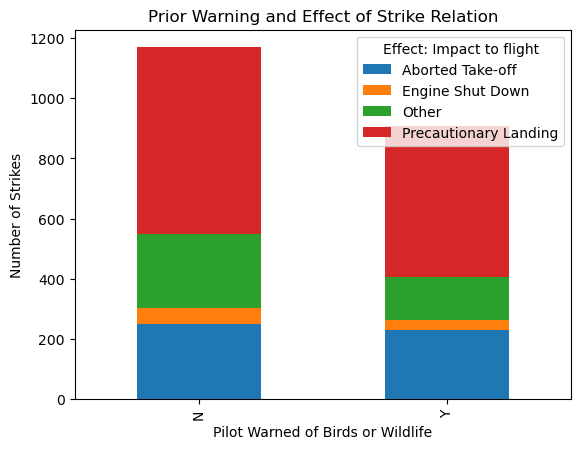

In [21]:
# plot stacked bar graph
prior_warning.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Pilot Warned of Birds or Wildlife')
plt.ylabel('Number of Strikes')
plt.title('Prior Warning and Effect of Strike Relation')
plt.show()

In [22]:
'''# conclusion:
 Based on the analysis, we can see that the number of bird strikes has been increasing over the years.
 The top 10 airlines with the most bird strikes are Delta, American, United, Southwest, FedEx, SkyWest, JetBlue, US Airways, ExpressJet, and Alaska Airlines.
 The top 50 airports with the most bird strikes are JFK, LAX, ORD, DFW, ATL, DEN, SFO, EWR, IAH, and MCO.
 The yearly cost incurred due to bird strikes has also been increasing over the years.
 Most bird strikes occur at low altitudes and during the take-off and landing phases of flight. 
 The majority of bird strikes have little'''

'# conclusion:\n Based on the analysis, we can see that the number of bird strikes has been increasing over the years.\n The top 10 airlines with the most bird strikes are Delta, American, United, Southwest, FedEx, SkyWest, JetBlue, US Airways, ExpressJet, and Alaska Airlines.\n The top 50 airports with the most bird strikes are JFK, LAX, ORD, DFW, ATL, DEN, SFO, EWR, IAH, and MCO.\n The yearly cost incurred due to bird strikes has also been increasing over the years.\n Most bird strikes occur at low altitudes and during the take-off and landing phases of flight. \n The majority of bird strikes have little'